No human-made images!
Вы попали на стажировку на платформе для AI-художников Greenterest. Наша команда занимается сервисом, который отлавливает изображения, нарисованные дизайнерами вручную, и блокирует аккаунты нарушителей. Хитрые дизайнеры научились выявлять уязвимости нашего детектора рукотворного творчества.

Например, наша система не очень хорошо дружит с поворотами, поэтому вас попросили написать простую аугментацию, чтобы дополнить обучающую выборку и обучить модель, устойчивую к такого рода атакам.

In [36]:
import cv2
import numpy as np


def rotated_image(image: np.ndarray, angle: int = 45) -> np.ndarray:
    """Rotate image by angle degrees."""
    width, height,channels = image.shape
    transform = cv2.getRotationMatrix2D((height / 2, width / 2), angle, 1)
    result = cv2.warpAffine(image, transform, (width, height))
    return result

In [52]:
import utils

In [53]:


def image_comparison_show(image, image_rotated):
    """ Support Function """
    # Print Result
    plt.subplot(121)
    plt.imshow(image)
    plt.subplot(122)
    plt.imshow(image_rotated)
    plt.show()


In [85]:
def rotated_image(image: np.ndarray, angle: int = 45) -> np.ndarray:
    """Rotate image by angle degrees."""
    height, width, _ = image.shape
    transform = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    result = cv2.warpAffine(image, transform, (width, height))
    return result

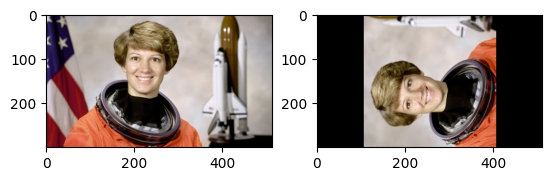

In [86]:
from skimage import data
img = data.astronaut()[:300, :, :] 
result = rotated_image(img,90)
image_comparison_show(img, result)

Что здесь происходит?

В первой строке мы достаём размерность изображения (прим. 1920х1080) и число каналов (прим. RGB).
Во второй строке мы задаём трансформацию: поворот на angle градусов по часовой стрелке.
В третьей строке мы применяем эту трансформацию к картинке. Возвращаем результат.

In [ ]:
from skimage.data import astronaut

import utils


def test_rotated_image() -> None:
    """Test rotated_image function."""
    image = astronaut()[:300, :, :]
    result = utils.rotated_image(image)
    assert result.shape == image.shape, f"{result.shape} != {image.shape}"

# def test_rotated_image():
#     """Тест функции поворота изображения."""
#     original_image = data.astronaut()[:300, :, :]
# 
#     result = utils.rotated_image(original_image)
#     assert isinstance(result, np.ndarray)
#     assert result.shape[2] == 3
# 
#     expected_shape = (original_image.shape[0], original_image.shape[1], 3)
#     assert result.shape == expected_shape
#     assert not np.array_equal(original_image, result)
#     # assert result.shape == image.shape
# 
#     assert np.any(result != 0)


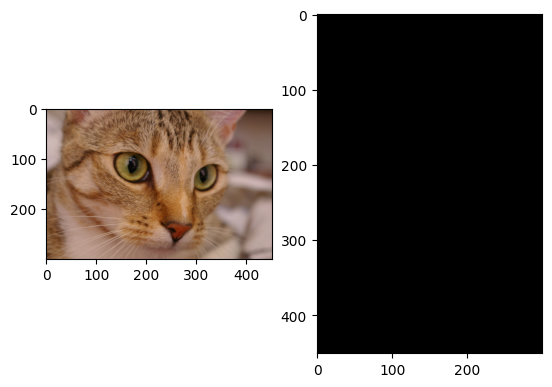

In [18]:
from skimage import data, transform
import matplotlib.pyplot as plt
import numpy as np
import cv2 


def image_comparison_show(image, image_rotated):
    """ Support Function """
    # Print Result
    plt.subplot(121)
    plt.imshow(image)
    plt.subplot(122)
    plt.imshow(image_rotated)
    plt.show()


def rotated_image1(image: np.ndarray, angle: int = 45) -> np.ndarray:
    width, height, channels = image.shape
    tf = transform.AffineTransform(rotation=np.deg2rad(angle))
    result   = cv2.warpPerspective(image, tf.params, dsize=(width, height))
    return result


# def rotated_image2(image: np.ndarray, angle: int = 45) -> np.ndarray:
#     """
#     Help: https://stackoverflow.com/questions/25895587/python-skimage-transform-affinetransform-rotation-center
#     """
#     width, height = np.array(image.shape[:2]) / 2.
#     tf_shift      = transform.AffineTransform(translation=[-height, -width])
#     tf_shift_inv  = transform.AffineTransform(translation=[height, width])
#     tf_rotate     = transform.AffineTransform(rotation=np.deg2rad(angle))
#     image_rotated = transform.warp(image=image, inverse_map=(tf_shift + (tf_rotate + tf_shift_inv)).inverse)
#     return image_rotated


def test_rotated_image1():
    """ Test Function from Lesson """
    image = data.chelsea()
    image_rotated = rotated_image1(image=image, angle=90)
    image_comparison_show(image=image, image_rotated=image_rotated)
# 
# 
# def test_rotated_image2():
#     """ Test My Function """
#     image = data.chelsea()
#     image_rotated = rotated_image2(image=image, angle=90)
#     image_comparison_show(image=image, image_rotated=image_rotated)

test_rotated_image1()
# if __name__ == "__main__":

    # test_rotated_image2()

In [80]:
def rotated_image(image: np.ndarray, angle: int = 45) -> np.ndarray:
    """Rotate image by angle degrees."""
    height, width, _ = image.shape
    transform = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    result = cv2.warpAffine(image, transform, (width, height))
    return result

# Эталонное решение

In [79]:
def rotated_image(image: np.ndarray, angle: int = 45) -> np.ndarray:
    """Rotate image by angle degrees."""
    width, height, _ = image.shape
    transform = cv2.getRotationMatrix2D((height / 2, width / 2), angle, 1)
    result = cv2.warpAffine(image, transform, (height, width))
    return result